Create new kernel **[ref](https://medium.com/@k.yara/how-to-set-up-a-conda-environment-with-a-jupyter-kernel-f9c963207491)**

In [15]:
''' list libs need to install
pip install rarfile
'''

' list libs need to install\npip install rarfile\n'

In [16]:
'''
!mkdir Data
!unrar e Photos.rar Data/
'''


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Photos.rar

Extracting  real_data_1_id0.jpg                                          0  OK 
Extracting  real_data_1_id10.jpg                                         0  OK 
Extracting  real_data_1_id100.jpg                                        0  OK 
Extracting  real_data_1_id101.jpg                                        0  OK 
Extracting  real_data_1_id102.jpg                                        0  OK 
Extracting  real_data_1_id103.jpg                                        0  OK 
Extracting  real_data_1_id104.jpg                                        0  OK 
Extracting  real_data_1_id107.jpg                                        0  OK 
Extracting  real_data_1_id108.jpg                                        0  OK 
Extracting  real_data_1_id109.jpg                                        0  OK 
Extracting  real_data_1_id11.jpg                                         0  OK 
Extracting  real

In [3]:
!conda list

# packages in environment at /home/jeremie/miniconda3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     4.0.0              pyhd8ed1ab_0    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py311h459d7ec_4    conda-forge
arrow                     1.3.0              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.0              pyhd8ed1ab_0    conda-forge
async-lru                 2.0.4              pyhd8ed1ab_0    conda-forge
attrs                     23.1.0             pyh71513ae_1    conda-forge
babel                     2.13.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                pyhd8ed1ab_3    conda-forge


# Setup Yolov5

In [1]:
# !git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16021, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 16021 (delta 31), reused 24 (delta 13), pack-reused 15967
Receiving objects: 100% (16021/16021), 14.69 MiB | 785.00 KiB/s, done.
Resolving deltas: 100% (10997/10997), done.


In [1]:
%cd yolov5/
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

/media/jeremie/Новый том/Volga/Tasks/2/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)

In [3]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

In [4]:
# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.1.0+cu121 CPU


# Setup example train data

In [6]:
import os
from os import listdir
import shutil
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [7]:
%pwd

'/media/jeremie/Новый том/Volga/Tasks/2/yolov5'

In [6]:
from roboflow import Roboflow

In [9]:
rf = Roboflow(api_key="j9BeuxHHmPvtY45FT8BN")
project = rf.workspace("itmo-university-xlmde").project("digital-meters-reading")
dataset = project.version(2).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Digital-Meters-Reading-2 in yolov5pytorch:: 10


In [40]:
folder_dir = "/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/train/images"

In [41]:
images_train_name = np.array([])
for images in os.listdir(folder_dir):
    if (images.endswith(".jpg")):
        images_train_name = np.append(images_train_name, images)
images_train_name.shape

(4300,)

In [42]:
np.random.seed(1)
examples_images_train = np.random.choice(images_train_name, size=200)
examples_images_train[:10]

array(['123_jpg.rf.95760f0c0723e524b7654ba9e4452176.jpg',
       'id_806_value_674_017_png_jpg.rf.807d0d2589276e8c66dd520eaba19500.jpg',
       '185_jpg.rf.e172aa23931d6e8ed462cf8ba5b19cba.jpg',
       '91_jpg.rf.7e385b505d49fcae0243f0b6c3c1d4ae.jpg',
       '90_jpg.rf.a3dc6639b583c9db4493efbe5a9d3c37.jpg',
       '113_jpg.rf.73a50ddd39d15a5f115d6458882750a6.jpg',
       'id_951_value_514_042_png_jpg.rf.b4fdcce82f225c96f81b0551f385230b.jpg',
       '92_jpg.rf.830325914aad33a451d63beba4006947.jpg',
       'id_40_value_158_359_png_jpg.rf.ab54f62d1991db31ea59e9cfa9d56b28.jpg',
       '212_jpg.rf.c5769b479c3807715b586d564869904d.jpg'], dtype='<U70')

In [43]:
examples_images_train_labels = np.array([image[:-3] + 'txt' for image in examples_images_train])
examples_images_train_labels[:10]

array(['123_jpg.rf.95760f0c0723e524b7654ba9e4452176.txt',
       'id_806_value_674_017_png_jpg.rf.807d0d2589276e8c66dd520eaba19500.txt',
       '185_jpg.rf.e172aa23931d6e8ed462cf8ba5b19cba.txt',
       '91_jpg.rf.7e385b505d49fcae0243f0b6c3c1d4ae.txt',
       '90_jpg.rf.a3dc6639b583c9db4493efbe5a9d3c37.txt',
       '113_jpg.rf.73a50ddd39d15a5f115d6458882750a6.txt',
       'id_951_value_514_042_png_jpg.rf.b4fdcce82f225c96f81b0551f385230b.txt',
       '92_jpg.rf.830325914aad33a451d63beba4006947.txt',
       'id_40_value_158_359_png_jpg.rf.ab54f62d1991db31ea59e9cfa9d56b28.txt',
       '212_jpg.rf.c5769b479c3807715b586d564869904d.txt'], dtype='<U69')

In [44]:
folder_labels = "/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/train/labels"

In [45]:
examples_images_train_labels_reduce = np.array([])
for image in os.listdir(folder_labels):
    if (image in examples_images_train_labels):
        examples_images_train_labels_reduce = np.append(examples_images_train_labels_reduce, image)
examples_images_train_labels_reduce.shape

(193,)

In [46]:
examples_images_train_labels = np.array([image[:-3] + 'jpg' for image in examples_images_train_labels_reduce])
examples_images_train_labels.shape

(193,)

**Copy train dataset**

In [47]:
## Copy example train images
# Providing the folder path
origin = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/train/images/'
target = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Example-Digital-Meters-Reading/train/images/'

# Fetching all the files to directory
for file_name in examples_images_train_labels:
   shutil.copy(origin+file_name, target+file_name)
print("Files are copied successfully")

Files are copied successfully


In [48]:
## Copy example train images labels
# Providing the folder path
origin = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/train/labels/'
target = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Example-Digital-Meters-Reading/train/labels/'

# Fetching all the files to directory
for file_name in examples_images_train_labels_reduce:
   shutil.copy(origin+file_name, target+file_name)
print("Files are copied successfully")

Files are copied successfully


**Copy valid dataset**

In [49]:
folder_dir = "/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/valid/images"

In [50]:
images_valid_name = np.array([])
for images in os.listdir(folder_dir):
    if (images.endswith(".jpg")):
        images_valid_name = np.append(images_valid_name, images)
images_valid_name.shape

(244,)

In [51]:
np.random.seed(1)
examples_images_valid = np.random.choice(images_valid_name, size=70)

In [52]:
examples_images_valid_labels = np.array([image[:-3] + 'txt' for image in examples_images_valid])
examples_images_valid_labels[:5]

array(['137_jpg.rf.e19709267be4005135f4986abbe99482.txt',
       '290_jpg.rf.9ac4c93c80d9abeee17810412b619aa7.txt',
       '312_jpg.rf.e96db58c4e6738ab3ac91c10984d7564.txt',
       '176_jpg.rf.4ba9357916c2615c119538e9f0174d1c.txt',
       '305_jpg.rf.07fb1c2d58a78ecbea34b746b7764248.txt'], dtype='<U68')

In [53]:
folder_labels = "/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/valid/labels"

In [54]:
examples_images_valid_labels_reduce = np.array([])
for image in os.listdir(folder_labels):
    if (image in examples_images_valid_labels):
        examples_images_valid_labels_reduce = np.append(examples_images_valid_labels_reduce, image)
examples_images_valid_labels_reduce.shape

(62,)

In [55]:
examples_images_valid_labels = np.array([image[:-3] + 'jpg' for image in examples_images_valid_labels_reduce])
examples_images_valid_labels.shape

(62,)

In [56]:
## Copy example valid images
# Providing the folder path
origin = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/valid/images/'
target = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Example-Digital-Meters-Reading/valid/images/'

# Fetching all the files to directory
for file_name in examples_images_valid_labels:
   shutil.copy(origin+file_name, target+file_name)
print("Files are copied successfully")

Files are copied successfully


In [57]:
## Copy example valid images labels
# Providing the folder path
origin = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/valid/labels/'
target = '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Example-Digital-Meters-Reading/valid/labels/'

# Fetching all the files to directory
for file_name in examples_images_valid_labels_reduce:
   shutil.copy(origin+file_name, target+file_name)
print("Files are copied successfully")

Files are copied successfully


# Sample training with Yolov5

In [58]:
%pwd

'/media/jeremie/Новый том/Volga/Tasks/2/yolov5'

In [59]:
des = f'{dataset.location}/data.yaml'
print(des)
%cat '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/data.yaml'

/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/data.yaml
names:
- '0'
nc: 1
roboflow:
  license: Private
  project: digital-meters-reading
  url: https://app.roboflow.com/itmo-university-xlmde/digital-meters-reading/2
  version: 2
  workspace: itmo-university-xlmde
test: ../test/images
train: Example-Digital-Meters-Reading/train/images
val: Example-Digital-Meters-Reading/valid/images


In [60]:
%cat ./models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

### Yolov5 training

In [61]:
# Error AttributeError: 'FreeTypeFont' object has no attribute 'getsize'
!pip install Pillow==9.5.0

In [62]:
!python train.py --img 640 --batch 8 --epochs 10 --data '/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/data.yaml' --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results

train: weights=, cfg=./models/yolov5s.yaml, data=/media/jeremie/Новый том/Volga/Tasks/2/yolov5/Digital-Meters-Reading-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 158 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to '/media/jeremie/Новый': No such file or directory
YOLOv5 🚀 2023-10-26 Python-3.11.5 torch-2.1.0+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_dec

In [64]:
%pwd

'/media/jeremie/Новый том/Volga/Tasks/2/yolov5'

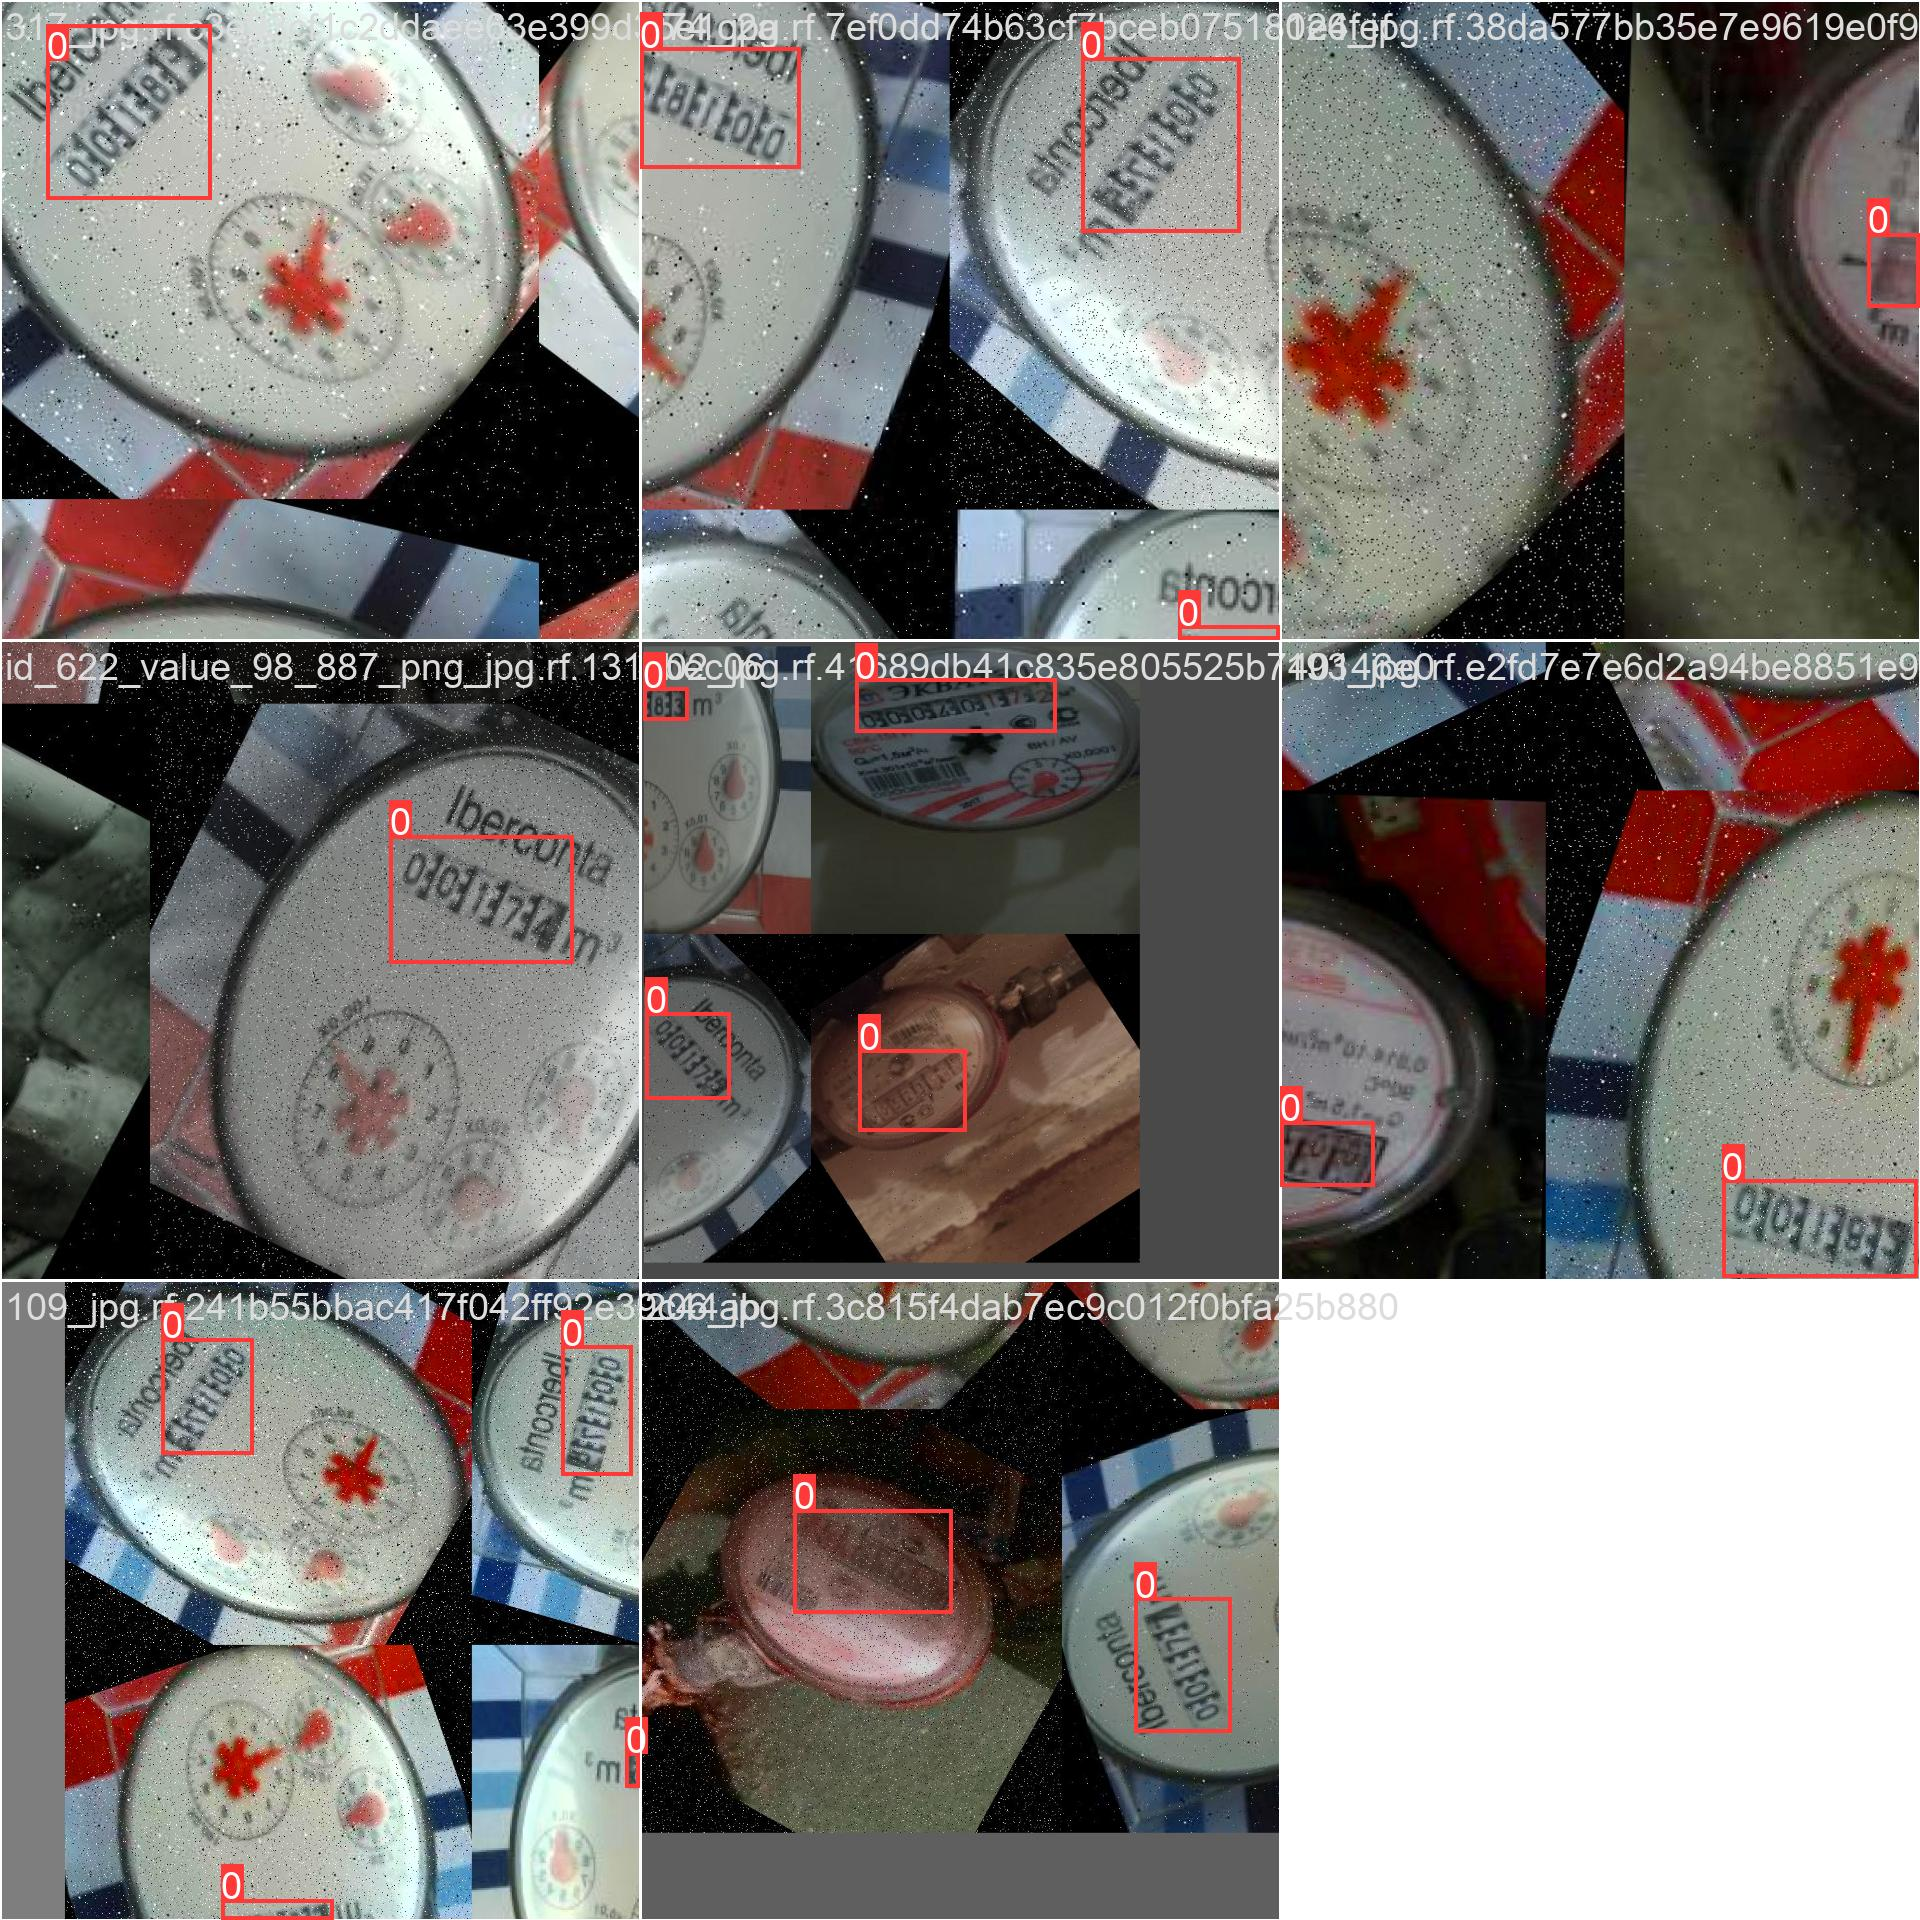

In [65]:
from IPython.display import Image
Image(filename='./runs/train/yolov5s_results3/train_batch0.jpg') 

In [67]:
%cd ..

/media/jeremie/Новый том/Volga/Tasks/2


In [11]:
def cal_limit_point(x, y, width, height):
    res = [(x-width/2,y-height/2), (x+width/2,y-height/2), (x-width/2,y+height/2), (x+width/2,y+height/2)]
    res = [tuple(int(x) for x in xy) for xy in res]
    return res

In [83]:
# Test predict image
model_local_train = project.version(dataset.version).model
test_image = model_local_train.predict("./Data/real_data_1_id6.jpg", confidence=40, overlap=30).json()['predictions'][0]
test_image

{'x': 277.0,
 'y': 399.5,
 'width': 208.0,
 'height': 131.0,
 'confidence': 0.9230411052703857,
 'class': '0',
 'class_id': 0,
 'image_path': './Data/real_data_1_id6.jpg',
 'prediction_type': 'ObjectDetectionModel'}

In [84]:
x_center = test_image['x']
y_center = test_image['y']
img_width = test_image['width']
img_height = test_image['height']
print('x_center: ', x_center)
print('y_center: ', y_center)

x_center:  277.0
y_center:  399.5


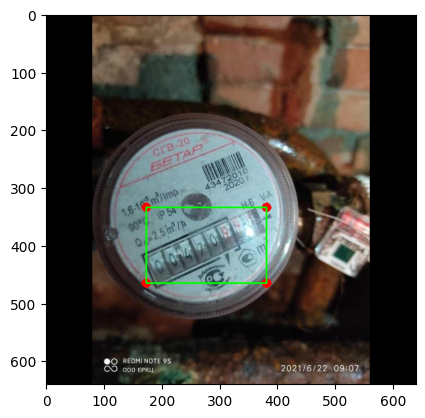

In [85]:
image = cv2.imread("./Data/real_data_1_id6.jpg")
# Display the image
lim_point = cal_limit_point(x_center, y_center, img_width, img_height)
# draw 4 point of limited area digital meters
for (x, y) in lim_point:
    image = cv2.circle(image, (x, y), radius=5, color=(0, 0, 255), thickness=5)

# dray rectangle
start_point = lim_point[0]
end_point = lim_point[-1]
image = cv2.rectangle(image, start_point, end_point, color=(0, 255, 0), thickness=2)

#convert RGB to show by plt
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

# Using model training on Roboflow

In [1]:
# Import model reading meters from Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="j9BeuxHHmPvtY45FT8BN")
project = rf.workspace().project("digital-meters-reading")
model_reading = project.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [2]:
# Import model determine rotate from Roboflow
rf = Roboflow(api_key="j9BeuxHHmPvtY45FT8BN")
project_rotate = rf.workspace().project("dimention-rotate")
model_rotate = project_rotate.version(3).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
# Import model recognize digits from Roboflow
# ... new model api
project_digit = rf.workspace().project("digital-number-detection-eztqm")
digit_model = project_digit.version(4).model

loading Roboflow workspace...
loading Roboflow project...


In [79]:
%pwd

'/media/jeremie/Новый том/Volga/Tasks/2'

In [4]:
# Apply for Volga data
volga_folder_dir = "./Data"

In [30]:
volga_images_data = np.array([])
for images in os.listdir(volga_folder_dir):
    if (images.endswith(".jpg")):
        volga_images_data = np.append(volga_images_data, images)
volga_images_data.shape

(4150,)

### Crop digital numbers area

In [93]:
volga_images_data[:5]

array(['real_data_5_id978.jpg', 'real_data_5_id979.jpg',
       'real_data_5_id980.jpg', 'real_data_5_id981.jpg',
       'real_data_5_id982.jpg'], dtype='<U32')

In [47]:
unrecognize_areas = []
unrecognize_number = []

In [9]:
model_rotate.predict('./Data/real_data_5_id978.jpg', confidence=50, overlap=50).json()['predictions'][0]['class']

'2'

In [40]:
import asyncio
def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
    return wrapped

In [46]:
@background
def detect_digit(image):
    img_path = "./Data/" + image
    
    # Load the image
    img = cv2.imread(img_path)
    
    target_path = "./Reading-Meters-Data/" + image
    # detemine rotate of image
    try:
        class_rotate = model_rotate.predict(img, confidence=50, overlap=50).json()['predictions'][0]['class']
    except:
        class_rotate = 1
        
    if class_rotate == '2':
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif class_rotate == '3':
        img = cv2.rotate(img, cv2.ROTATE_180)
    elif class_rotate == '4':
        img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    else:
        pass
    # print(img_path)
    try:
        predict_res = model_reading.predict(img, confidence=20, overlap=30).json()['predictions'][0]
    except IndexError:
        try:
            predict_res = model_reading.predict(img, confidence=0.1, overlap=30).json()['predictions'][0]
        except:
            unrecognize_areas.append(img_path)
    # get data predict
    x_center = predict_res['x']
    y_center = predict_res['y']
    img_width = predict_res['width']
    img_height = predict_res['height']

    # calculate 4 points of rectangle
    lim_point = cal_limit_point(x_center, y_center, img_width, img_height)
    start_point = lim_point[0]
    end_point = lim_point[-1]

    # crop image
    cropped_image = img[start_point[1]:end_point[1], start_point[0]:end_point[0]]
    cropped_image_zoomin = cv2.resize(cropped_image, (640, 640), interpolation = cv2.INTER_AREA)
    cv2.imwrite(target_path, cropped_image_zoomin)

    try:
        digit_rgnz = digit_model.predict(cropped_image_zoomin, confidence=50, overlap=30).json()['predictions']
        sorted_digit_rgnz = sorted(digit_rgnz, key=lambda d: (d['x'], d['y']))
        # linear_angle = cal_linear_angle(sorted_digit_rgnz)
        print(img_path)
        for digit in sorted_digit_rgnz:
            print(digit['class_id'], end=' ')
        print()
        print('-' * 20)
        
    except:
        unrecognize_number.append(img_path)

In [48]:
for image in volga_images_data[:100]:
    detect_digit(image)

./Data/real_data_5_id987.jpg
4 3 
--------------------
./Data/real_data_5_id982.jpg
0 2 6 
--------------------
./Data/real_data_5_id984.jpg
0 2 3 6 9 8 4 
--------------------
./Data/real_data_5_id981.jpg
0 9 5 1 8 
--------------------
./Data/real_data_5_id979.jpg
1 6 1 4 2 
--------------------


Future exception was never retrieved
future: <Future finished exception=UnboundLocalError("local variable 'predict_res' referenced before assignment")>
Traceback (most recent call last):
  File "/home/jeremie/miniconda3/envs/gpu-test/lib/python3.10/concurrent/futures/thread.py", line 58, in run
    result = self.fn(*self.args, **self.kwargs)
  File "/tmp/ipykernel_5103/4237777615.py", line 32, in detect_digit
    x_center = predict_res['x']
UnboundLocalError: local variable 'predict_res' referenced before assignment
Future exception was never retrieved
future: <Future finished exception=UnboundLocalError("local variable 'predict_res' referenced before assignment")>
Traceback (most recent call last):
  File "/home/jeremie/miniconda3/envs/gpu-test/lib/python3.10/concurrent/futures/thread.py", line 58, in run
    result = self.fn(*self.args, **self.kwargs)
  File "/tmp/ipykernel_5103/4237777615.py", line 32, in detect_digit
    x_center = predict_res['x']
UnboundLocalError: local variable

./Data/real_data_5_id989.jpg
0 3 2 5 3 5 
--------------------


Future exception was never retrieved
future: <Future finished exception=UnboundLocalError("local variable 'predict_res' referenced before assignment")>
Traceback (most recent call last):
  File "/home/jeremie/miniconda3/envs/gpu-test/lib/python3.10/concurrent/futures/thread.py", line 58, in run
    result = self.fn(*self.args, **self.kwargs)
  File "/tmp/ipykernel_5103/4237777615.py", line 32, in detect_digit
    x_center = predict_res['x']
UnboundLocalError: local variable 'predict_res' referenced before assignment


./Data/real_data_5_id978.jpg
8 7 8 3 0 
--------------------
./Data/real_data_5_id988.jpg
0 2 4 5 4 8 8 2 0 
--------------------
./Data/real_data_5_id986.jpg

--------------------
./Data/real_data_5_id994.jpg
6 5 9 3 3 2 
--------------------
./Data/real_data_5_id993.jpg
0 7 9 8 1 6 9 
--------------------
./Data/real_data_5_id991.jpg
1 8 8 5 0 8 4 8 
--------------------
./Data/real_data_5_id999.jpg
4 7 
--------------------
./Data/real_data_5_id992.jpg
0 4 1 5 6 4 1 
--------------------
./Data/real_data_5_id990.jpg
1 8 3 0 4 6 4 2 
--------------------
./Data/real_data_5_id995.jpg
0 2 1 
--------------------
./Data/real_data_5_id996.jpg
8 3 7 0 9 
--------------------
./Data/real_data_5_id997.jpg
3 6 3 9 6 2 
--------------------
./Data/real_data_1_id0.jpg
4 7 
--------------------
./Data/real_data_5_id998.jpg
5 7 2 2 
--------------------
./Data/real_data_1_id10.jpg
0 2 3 3 8 5 
--------------------
./Data/real_data_1_id102.jpg
2 9 7 
--------------------
./Data/real_data_1_id101.

In [49]:
len(unrecognize_number)

0

In [34]:
unrecognize_number

['./Data/real_data_5_id978.jpg',
 './Data/real_data_5_id979.jpg',
 './Data/real_data_5_id980.jpg',
 './Data/real_data_5_id981.jpg',
 './Data/real_data_5_id982.jpg',
 './Data/real_data_5_id983.jpg',
 './Data/real_data_5_id984.jpg',
 './Data/real_data_5_id985.jpg',
 './Data/real_data_5_id986.jpg',
 './Data/real_data_5_id987.jpg',
 './Data/real_data_5_id988.jpg',
 './Data/real_data_5_id989.jpg',
 './Data/real_data_5_id990.jpg',
 './Data/real_data_5_id991.jpg',
 './Data/real_data_5_id992.jpg',
 './Data/real_data_5_id993.jpg',
 './Data/real_data_5_id994.jpg',
 './Data/real_data_5_id995.jpg',
 './Data/real_data_5_id996.jpg',
 './Data/real_data_2_id258.jpg']

In [36]:
# Providing the folder path
origin = '/media/jeremie/Новый том/Volga/Tasks/2/Reading-Meters-Data/'
target = '/media/jeremie/Новый том/Volga/Tasks/2/unpredict_digit/'

# Fetching all the files to directory
for file_name in unrecognize_number:
   shutil.copy(origin+file_name[6:], target+file_name[6:])
print("Files are copied successfully")

Files are copied successfully
